# Labs Access Analysis: 03 Map Plot

## Setup

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import json
pd.options.mode.chained_assignment = None
import branca.colormap as cmp
import os
import time
import folium
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings('ignore') # ignore warnings

# Change the font
sns.set_context("poster", font_scale=1.5)
sns.set_style(style="whitegrid")
matplotlib.rc('font', family='serif', serif='Fira Sans')

In [ ]:
# create the directory with the data
if not os.path.exists('data'):
    os.makedirs('data') 
# create the directory where store the svg files
if not os.path.exists('svg'):
    os.makedirs('svg') 
# create the directory with the png files
if not os.path.exists('png'):
    os.makedirs('png')
# create the directory with the html files (maps)
if not os.path.exists('html'):
    os.makedirs('html')

In [3]:
url_data_labs = "https://openp2pdesign.github.io/labs_access_analysis/data/labs.csv"
url_data_isochrones = "https://openp2pdesign.github.io/labs_access_analysis/data/isochrones.json"
##REMOVE these lines when you are ready to publish the data
url_data_labs = "data/labs.csv"
url_data_isochrones = "data/isochrones.json"

In [2]:
# Load data, json
with open(url_data_isochrones) as json_file:
    data = json.load(json_file)

In [3]:
# Load data, csv
labs = pd.read_csv(url_data_labs)

In [4]:
locations = {}
for i in data:
  locations[i['name']] = i['metadata']['query']['locations'][0]

### Map visualziation

In [4]:
m=folium.Map(location=[41.396721,2.1943200000000003])
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)

In [6]:
for loc in locations:
  folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(m)

In [7]:
m

organize the data

In [8]:
rows = []
for h in data:
  rows.append([h["name"], h["features"][0]["properties"]["total_pop"], h["features"][0]["properties"]["area"], h["features"][0]["properties"]["reachfactor"], h["features"][0]["geometry"]["coordinates"], []])

In [9]:
map_data = pd.DataFrame(rows, columns=['Name', 'total_pop', 'area', 'reachfactor','geometry', 'isochrone'])
map_data.head()

Name  total_pop        area  reachfactor  \
0          Fab Lab Barcelona    85512.0  4414692.78       0.8994   
1  MADE Makerspace Barcelona    88686.0  4388387.03       0.8940   
2                  Soko Tech    90167.0  4342783.41       0.8847   
3                  LSCongres    95371.0  4470928.42       0.9108   
4              Green Fab Lab       49.0   833458.39       0.1698   

                                            geometry isochrone  
0  [[[2.181814, 41.394814], [2.181818, 41.394634]...        []  
1  [[[2.127469, 41.374827], [2.128301, 41.370212]...        []  
2  [[[2.174851, 41.424714], [2.174888, 41.423775]...        []  
3  [[[2.167014, 41.427727], [2.167345, 41.426543]...        []  
4  [[[2.126857, 41.450915], [2.12691, 41.450127],...        []

create a flip isochrone cell for each lab

In [10]:
for ind in map_data.index:
     row_iso = []
     for coords in map_data['geometry'][ind][0]:
       row_iso.append([coords[1], coords[0], 900])
     map_data.at[ind, 'isochrone'] = row_iso

In [11]:
map_data.set_index('Name', inplace=True)
labs.set_index('Name', inplace=True)

add colums from the csv file (the labs) to the json file (the isochrones)

In [12]:
full_map_data = map_data.join(labs)

In [13]:
full_map_data

total_pop        area  reachfactor  \
Name                                                            
Fab Lab Barcelona            85512.0  4414692.78       0.8994   
MADE Makerspace Barcelona    88686.0  4388387.03       0.8940   
Soko Tech                    90167.0  4342783.41       0.8847   
LSCongres                    95371.0  4470928.42       0.9108   
Green Fab Lab                   49.0   833458.39       0.1698   
...                              ...         ...          ...   
Canodrom                     95440.0  4447669.05       0.9061   
Cibernàrium Nou Barris       82690.0  4267125.62       0.8693   
Cibernàrium 22@              94265.0  4327990.85       0.8817   
Fundació Comtal              91473.0  4487281.18       0.9141   
Fundació Avismón             94273.0  4505873.51       0.9179   

                                                                    geometry  \
Name                                                                           
Fab Lab Barcelona          [[[2.181814, 41.394814], [2.181818, 41.394634]...   
MADE Makerspace Barcelona  [[[2.127469, 41.374827], [2.128301, 41.370212]...   
Soko Tech                  [[[2.174851, 41.424714], [2.174888, 41.423775]...   
LSCongres                  [[[2.167014, 41.427727], [2.167345, 41.426543]...   
Green Fab Lab              [[[2.126857, 41.450915], [2.12691, 41.450127],...   
...                                                                      ...   
Canodrom                   [[[2.167483, 41.429093], [2.168657, 41.425985]...   
Cibernàrium Nou Barris     [[[2.154543, 41.439983], [2.155089, 41.436545]...   
Cibernàrium 22@            [[[2.181348, 41.401213], [2.182405, 41.396165]...   
Fundació Comtal            [[[2.16536, 41.388603], [2.166275, 41.384335],...   
Fundació Avismón           [[[2.121454, 41.37487], [2.121459, 41.374771],...   

                                                                   isochrone  \
Name                                                                           
Fab Lab Barcelona          [[41.394814, 2.181814, 900], [41.394634, 2.181...   
MADE Makerspace Barcelona  [[41.374827, 2.127469, 900], [41.370212, 2.128...   
Soko Tech                  [[41.424714, 2.174851, 900], [41.423775, 2.174...   
LSCongres                  [[41.427727, 2.167014, 900], [41.426543, 2.167...   
Green Fab Lab              [[41.450915, 2.126857, 900], [41.450127, 2.126...   
...                                                                      ...   
Canodrom                   [[41.429093, 2.167483, 900], [41.425985, 2.168...   
Cibernàrium Nou Barris     [[41.439983, 2.154543, 900], [41.436545, 2.155...   
Cibernàrium 22@            [[41.401213, 2.181348, 900], [41.396165, 2.182...   
Fundació Comtal            [[41.388603, 2.16536, 900], [41.384335, 2.1662...   
Fundació Avismón           [[41.37487, 2.121454, 900], [41.374771, 2.1214...   

                                            Type                   City  \
Name                                                                      
Fab Lab Barcelona                        Fab Lab              Barcelona   
MADE Makerspace Barcelona                Fab Lab              Barcelona   
Soko Tech                                Fab Lab              Barcelona   
LSCongres                                Fab Lab              Barcelona   
Green Fab Lab                            Fab Lab  Cerdanyola del Vallès   
...                                          ...                    ...   
Canodrom                              City Space              Barcelona   
Cibernàrium Nou Barris     Incubator/Accelerator              Barcelona   
Cibernàrium 22@            Incubator/Accelerator              Barcelona   
Fundació Comtal                       Foundation              Barcelona   
Fundació Avismón                      Foundation              Barcelona   

                          Cluster                                 Address  \
Name                                          

Transform the areas in square km


In [14]:
map_data["area"] = map_data["area"] / 1000000.0

In [43]:
map_data["area"].head()

Name
Fab Lab Barcelona            4.414693
MADE Makerspace Barcelona    4.388387
Soko Tech                    4.342783
LSCongres                    4.470928
Green Fab Lab                0.833458
Name: area, dtype: float64

### Population reached

plot the data

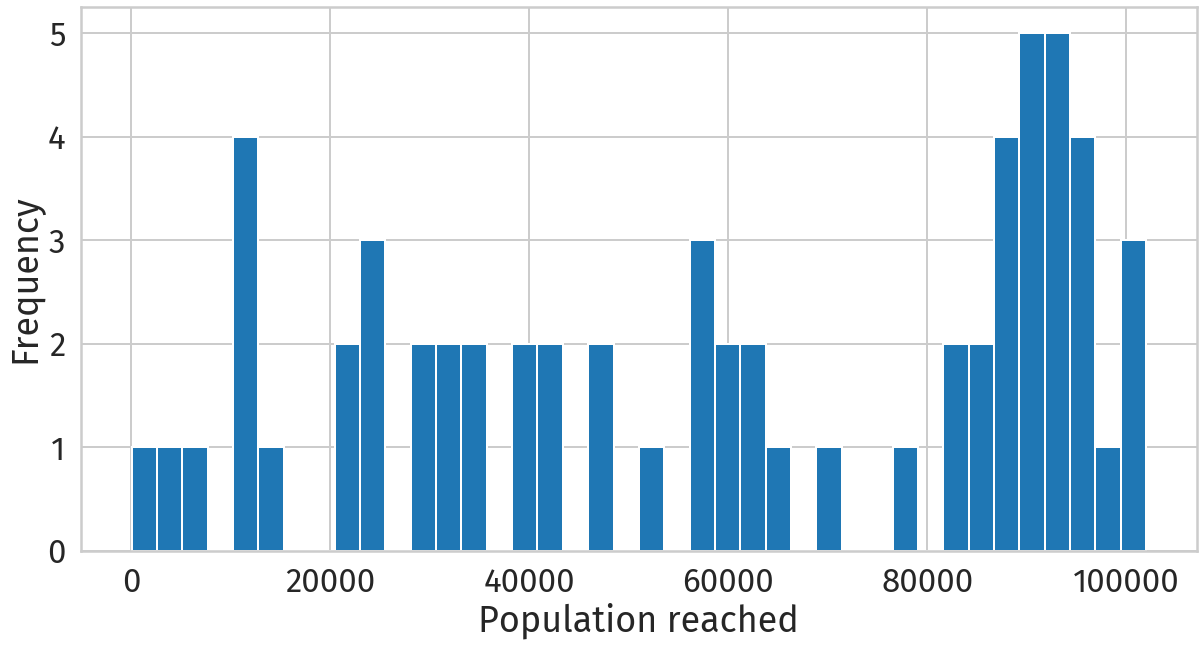

In [15]:
map_data["total_pop"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Population reached')
plt.savefig("svg" + os.sep + "labs_population_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_population_hist.png", dpi=300, bbox_inches="tight")

plot the data of the population reached by each lab

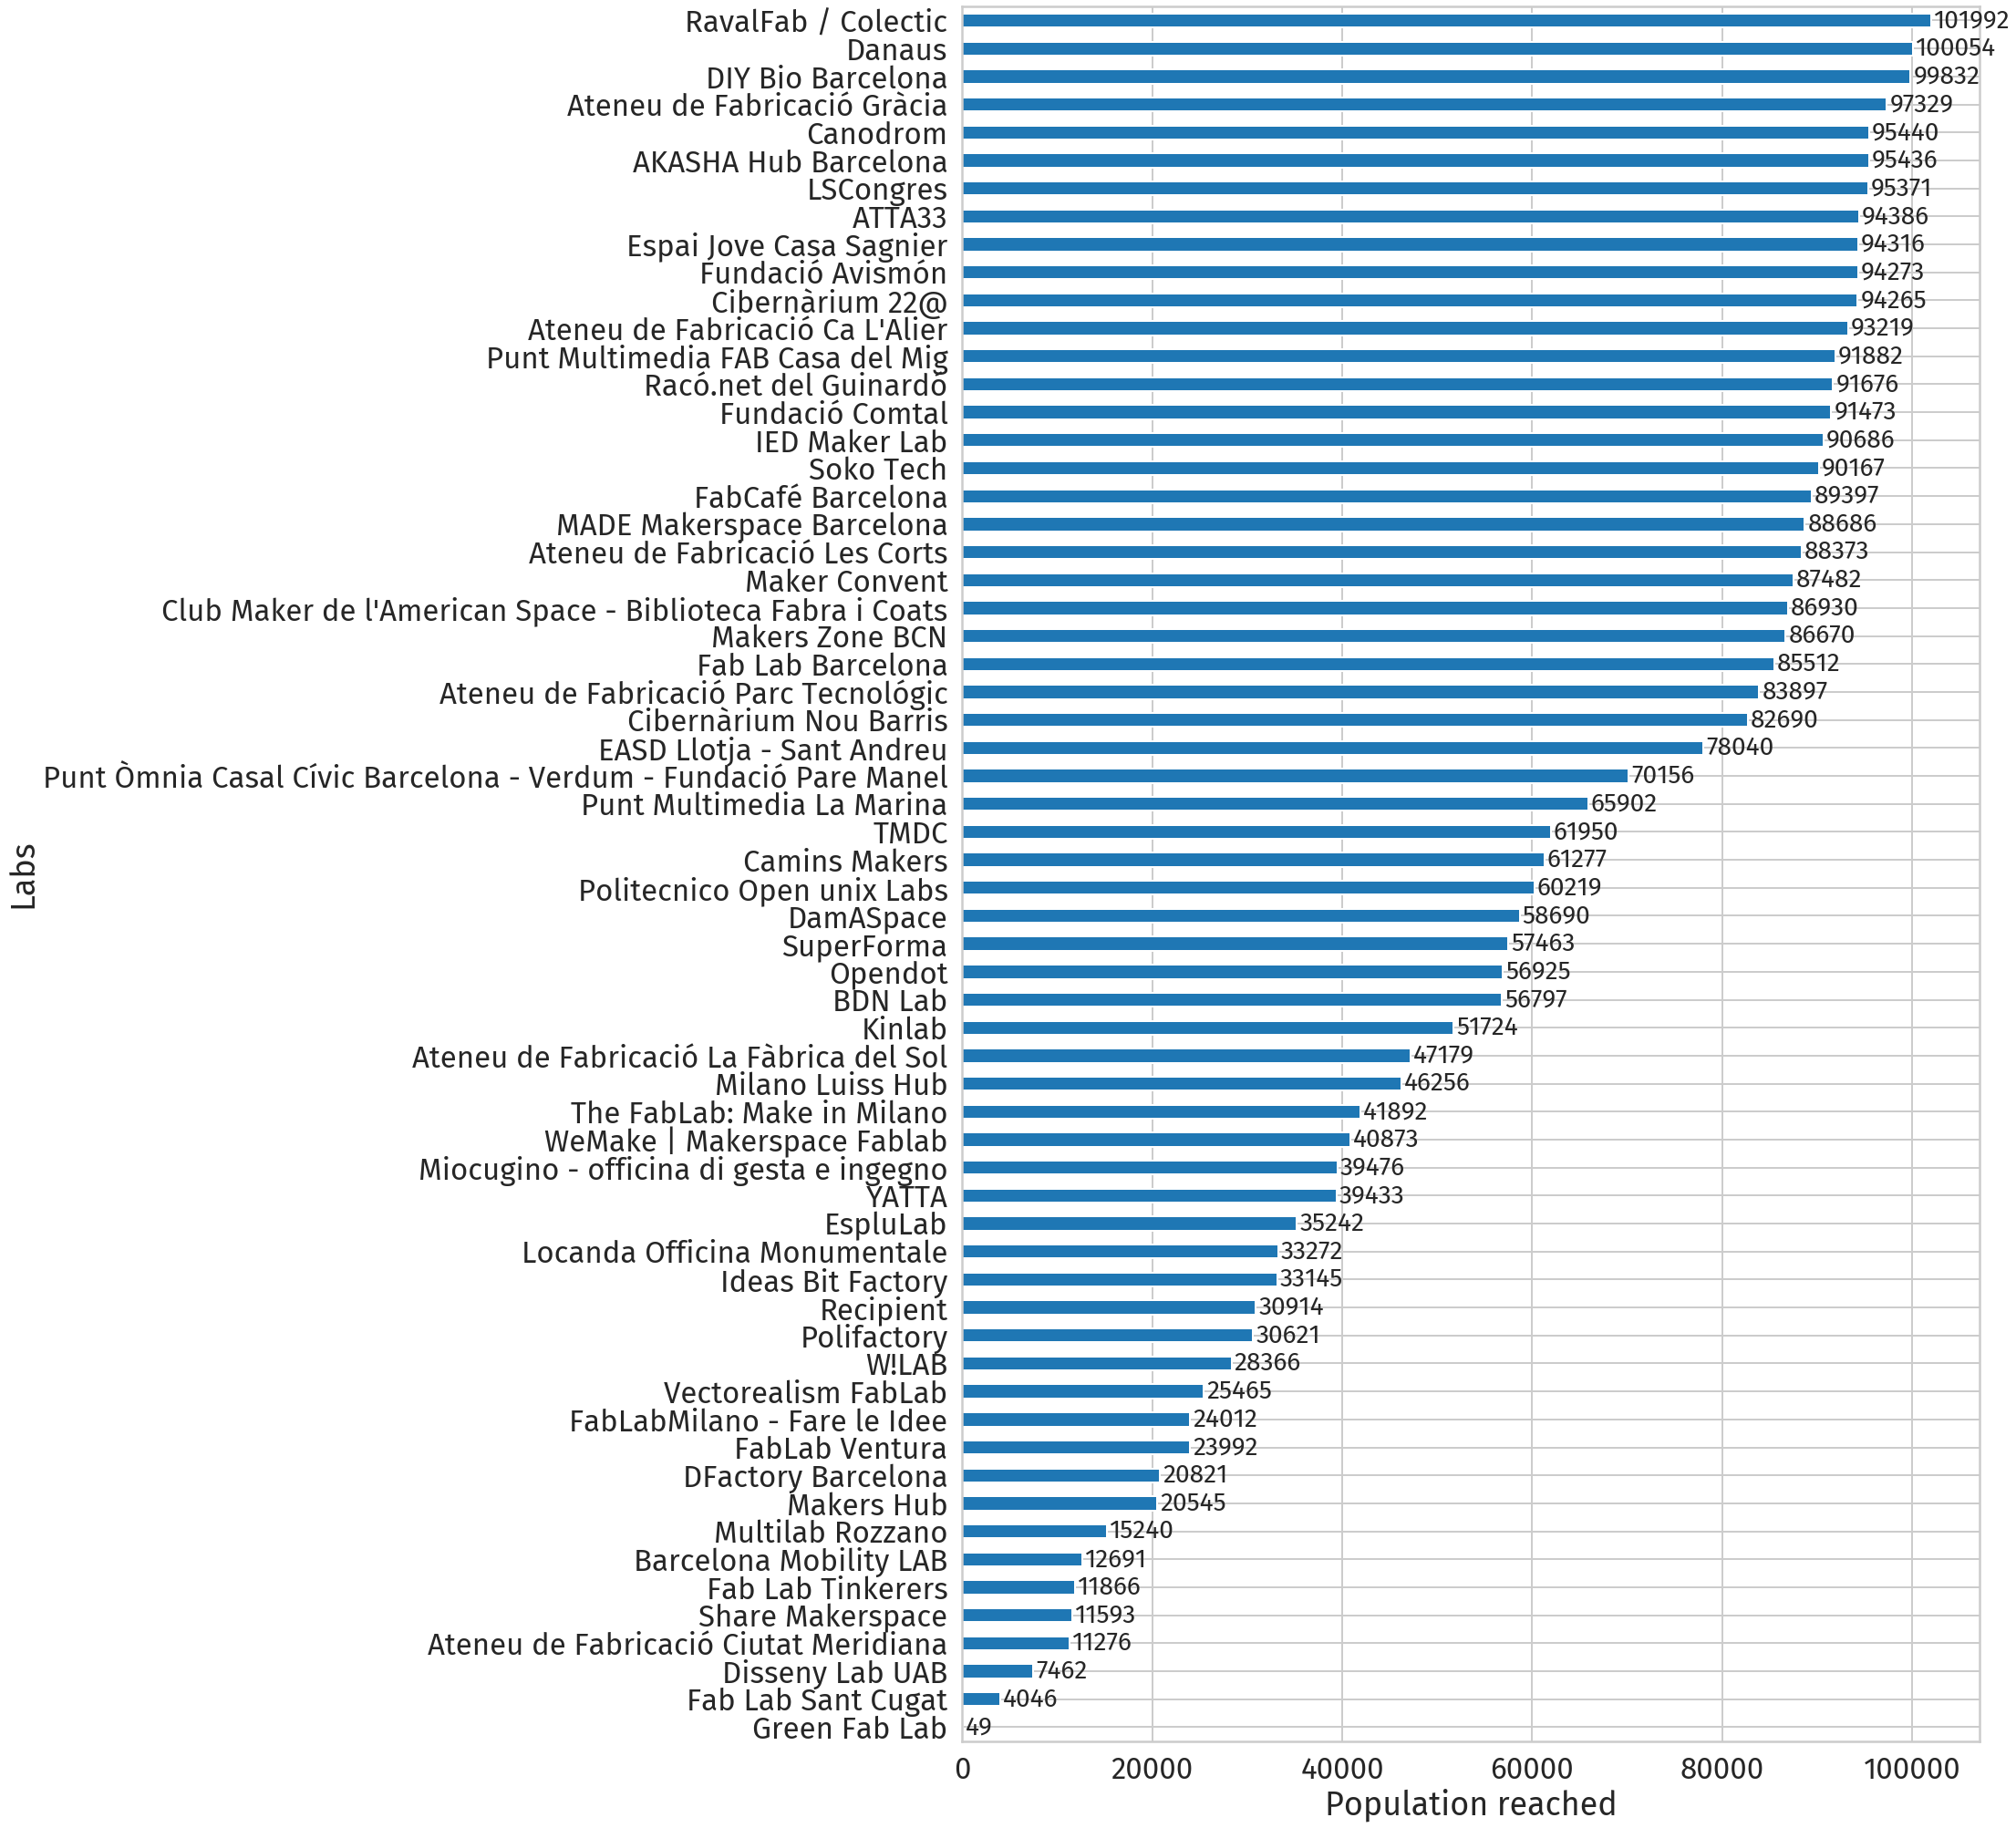

In [16]:
ax = map_data.sort_values(by=['total_pop'])['total_pop'].plot(kind="barh", figsize=(20,35))
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
plt.xlabel('Population reached')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_population_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_population_bar.png", dpi=300, bbox_inches="tight")

### Area reached

Plot the data

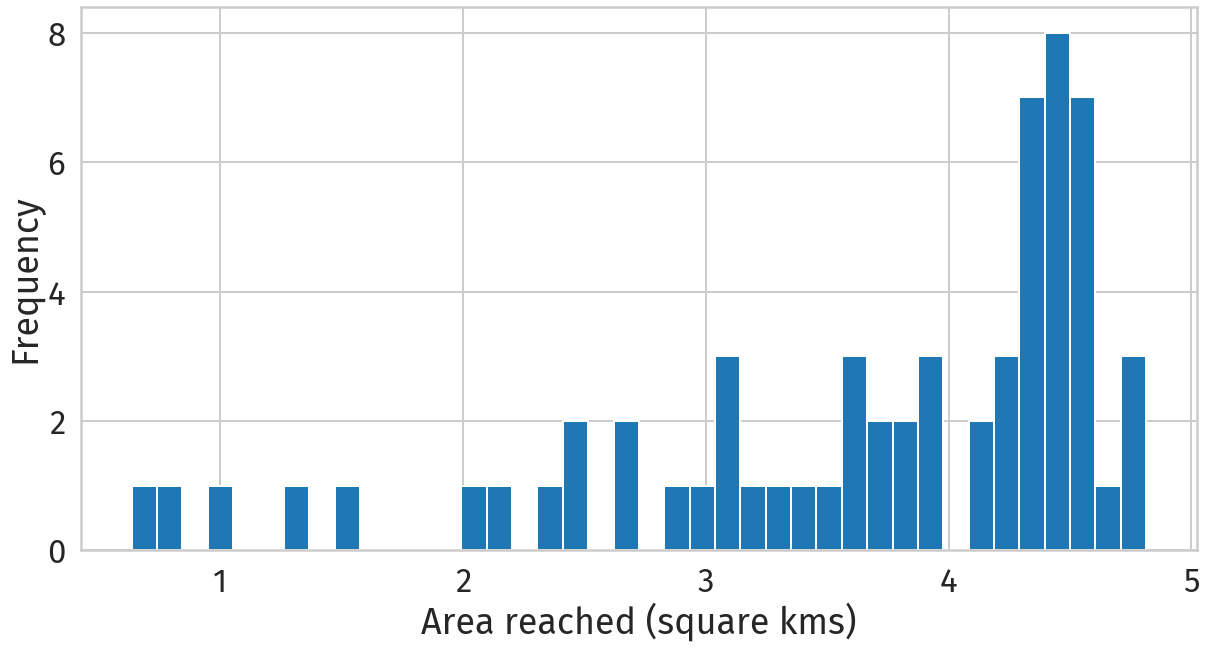

In [17]:
map_data["area"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Area reached (square kms)')
plt.savefig("svg" + os.sep + "labs_area_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_area_hist.png", dpi=300, bbox_inches="tight")

Plot the data of the area reached by each lab

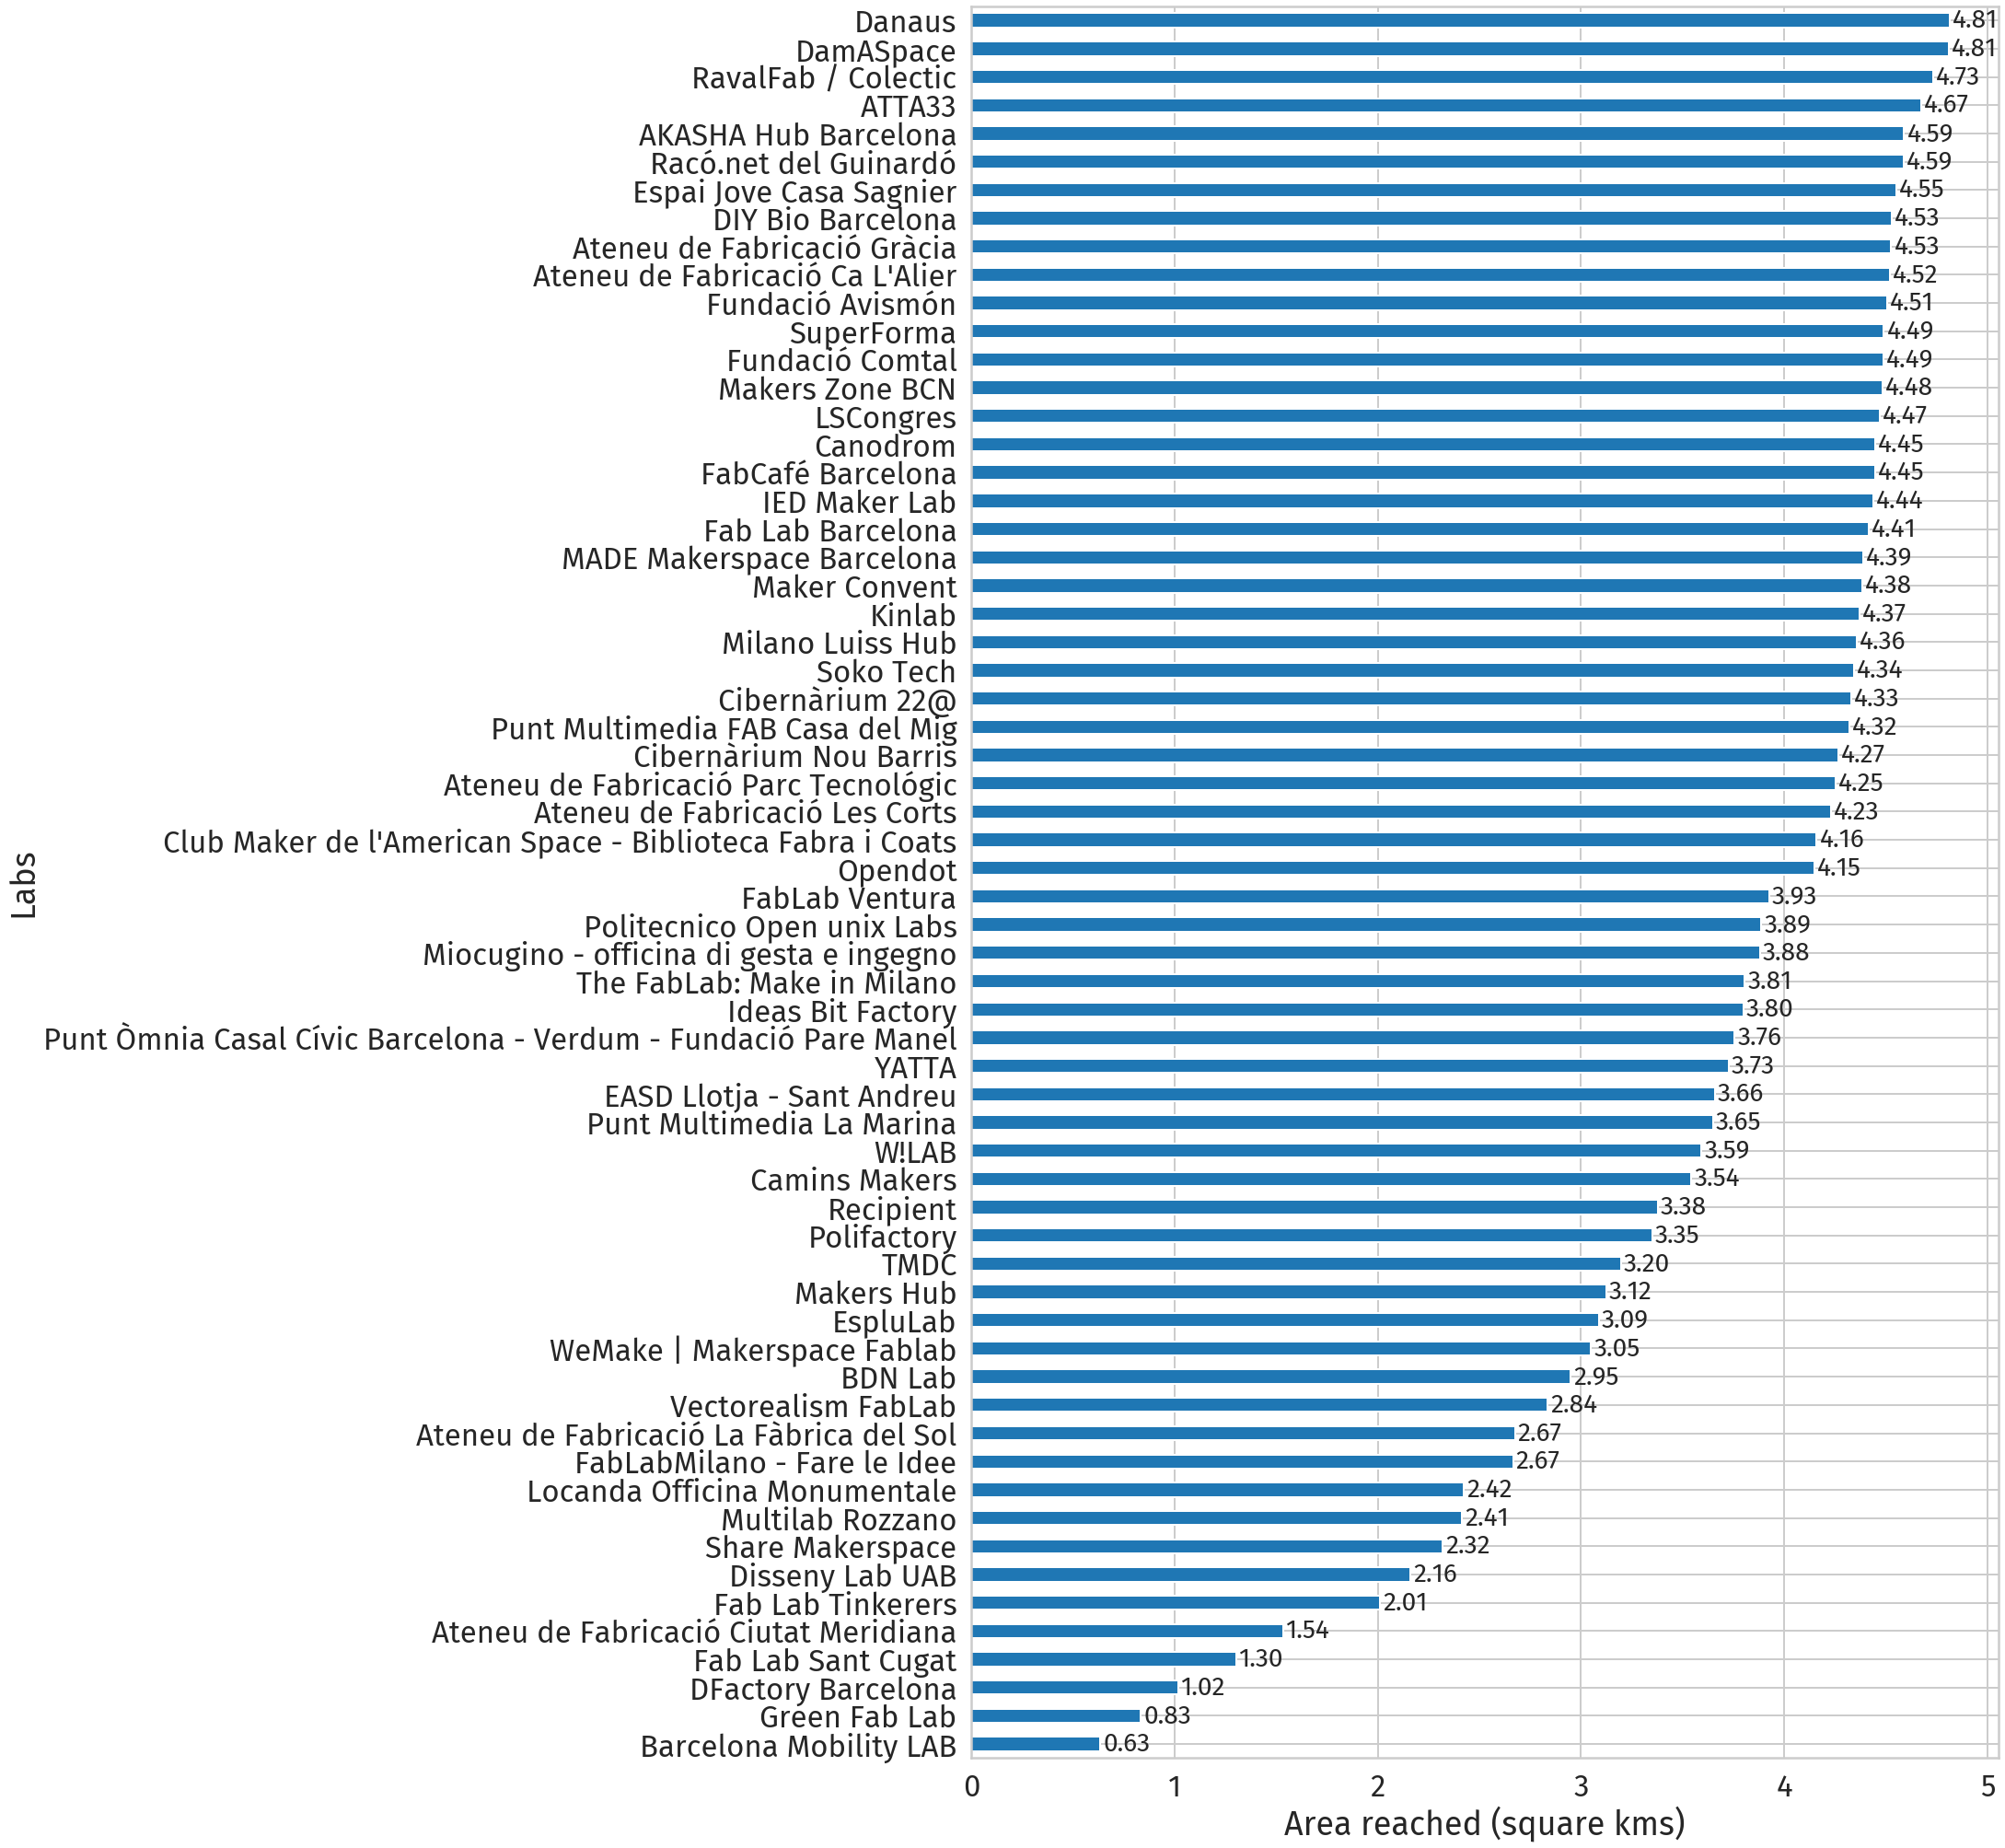

In [44]:
ax = map_data.sort_values(by=['area'])['area'].plot(kind="barh", figsize=(20,35))
ax.bar_label(ax.containers[0], fmt="%.2f", size=28, padding=3)
plt.xlabel('Area reached (square kms)')
plt.ylabel('Labs')
plt.savefig("svg" + "labs_area_bar.svg", bbox_inches="tight")
plt.savefig("png" + "labs_area_bar.png", dpi=300, bbox_inches="tight")

### Reach Factor

Plot the data

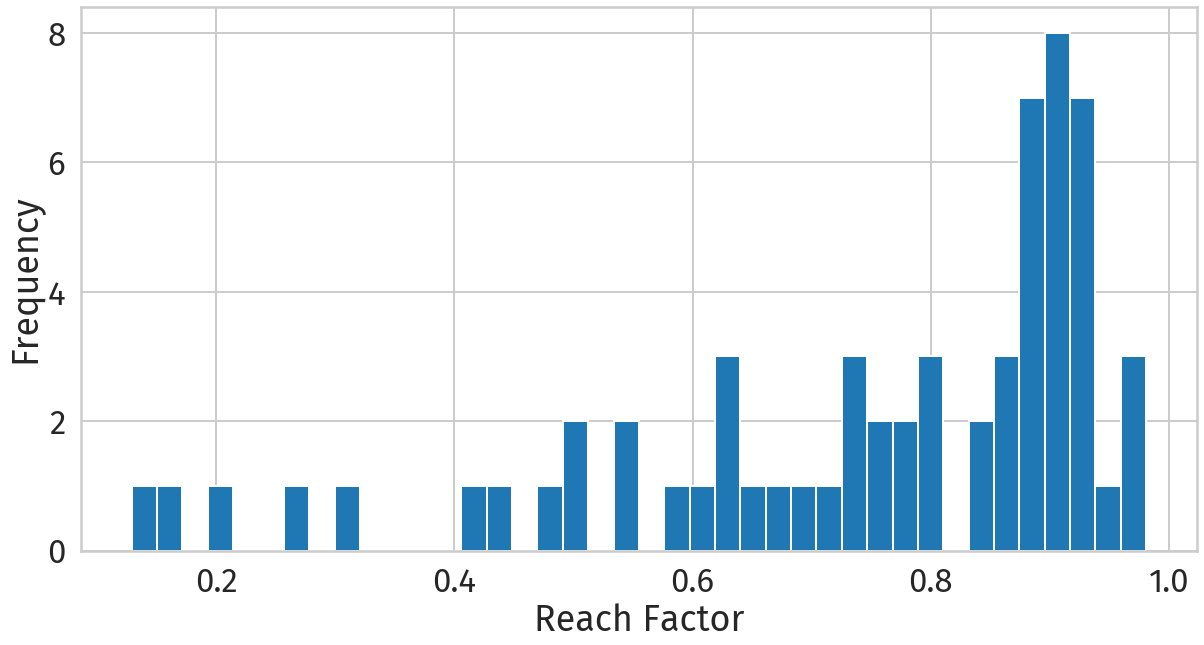

In [19]:
map_data["reachfactor"].plot(kind="hist", bins=40, figsize=(20,10))
plt.xlabel('Reach Factor')
plt.savefig("svg" + os.sep + "labs_reachfactor_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_reachfactor_hist.png", dpi=300, bbox_inches="tight")

plot the data of the reach factor for each lab

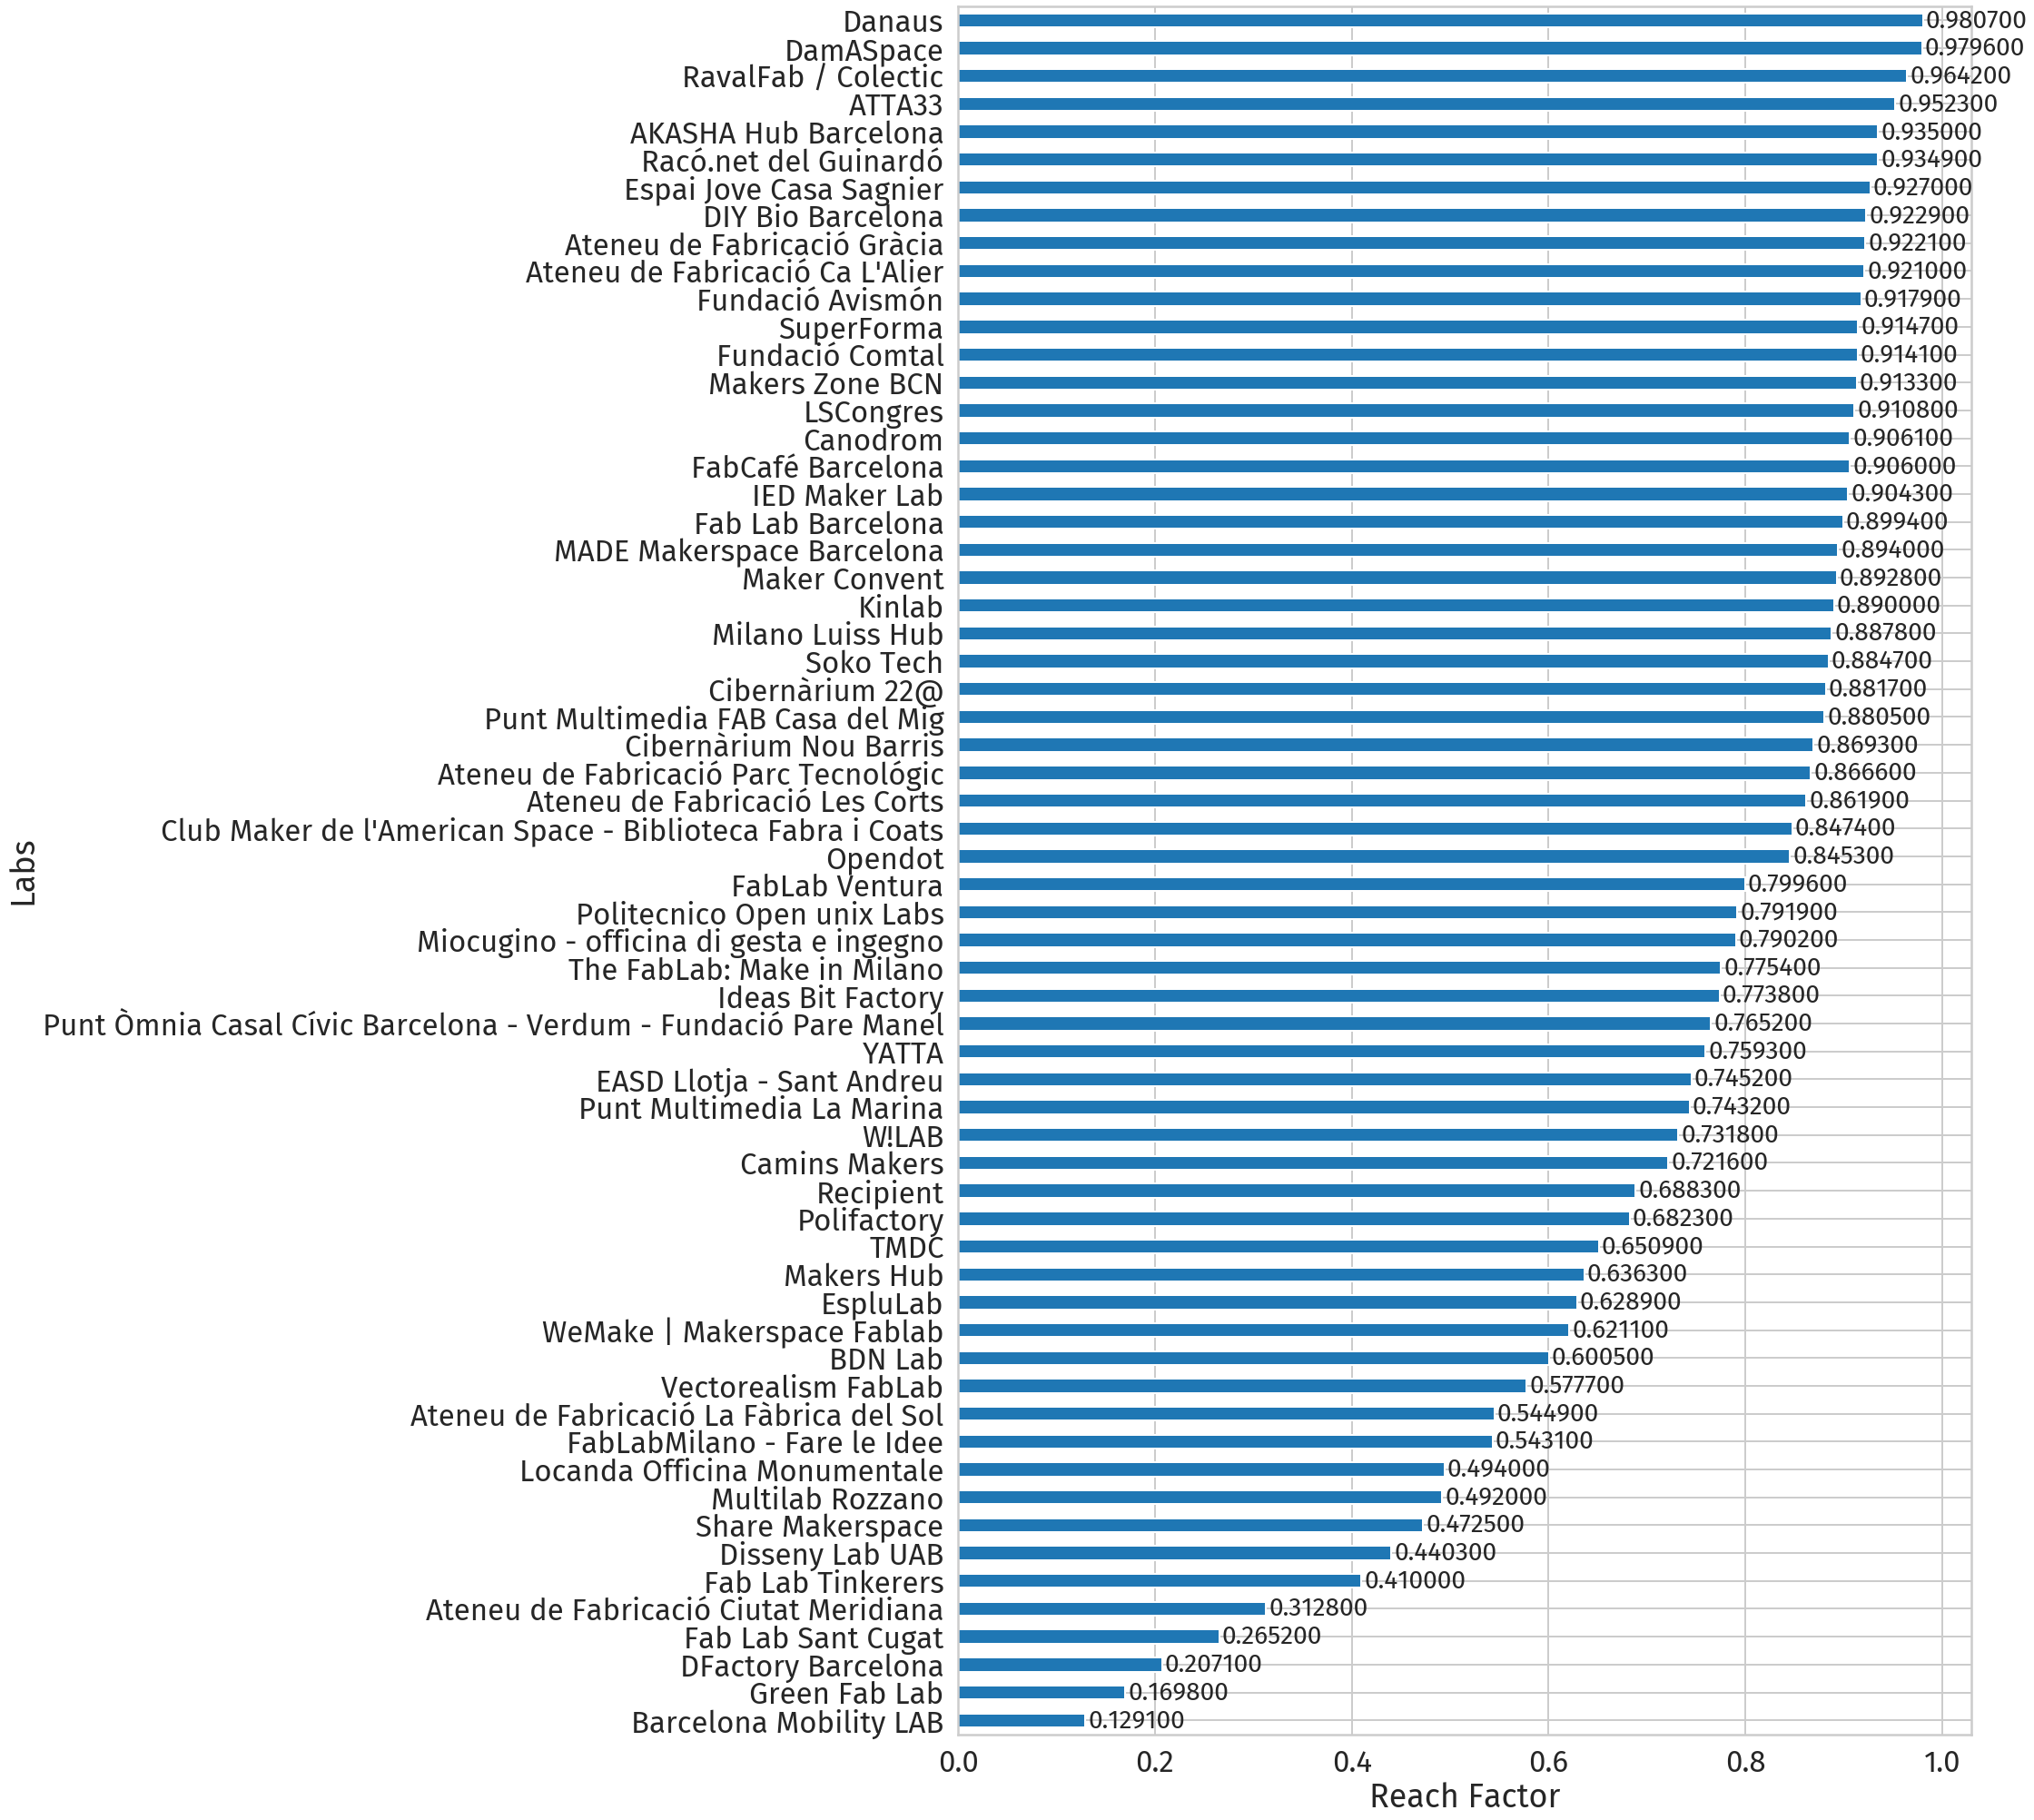

In [20]:
ax = map_data.sort_values(by=['reachfactor'])['reachfactor'].plot(kind="barh", figsize=(20,35))
ax.bar_label(ax.containers[0], fmt="%f", size=28, padding=3)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_reachfactor_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_reachfactor_bar.png", dpi=300, bbox_inches="tight")

### Labs values clustered by city

In [21]:
full_map_data.groupby(["Cluster","Type"]).size()

Cluster  Type                 
BCN      Ateneu de Fabricació      6
         City Space                7
         DIYBio Lab                1
         Fab Lab                  11
         FabCafé                   1
         Foundation                2
         Hackerspace               2
         Incubator/Accelerator     3
         Library                   1
         Makerspace                4
         Service                   1
         University Lab            3
MI       DIYBio Lab                1
         Fab Lab                   7
         Hackerspace               1
         Incubator/Accelerator     1
         Makerspace                6
         Service                   3
         University Lab            1
dtype: int64

In [22]:
full_map_data.groupby("Cluster")["total_pop"].sum()

Cluster
BCN    2964554.0
MI      741750.0
Name: total_pop, dtype: float64

In [23]:
full_map_data.groupby("Cluster")["total_pop"].describe()

count          mean           std      min       25%      50%  \
Cluster                                                                  
BCN       42.0  70584.619048  32274.130391     49.0  57917.00  87206.0   
MI        20.0  37087.500000  14771.664292  11593.0  25101.75  36352.5   

             75%       max  
Cluster                     
BCN      94003.5  101992.0  
MI       47623.0   60219.0

In [24]:
full_map_data.groupby("Cluster")["area"].sum()

Cluster
BCN    1.554967e+08
MI     7.075904e+07
Name: area, dtype: float64

In [25]:
full_map_data.groupby("Cluster")["area"].describe()

count          mean           std         min          25%  \
Cluster                                                               
BCN       42.0  3.702302e+06  1.192265e+06   633895.88  3281968.685   
MI        20.0  3.537952e+06  7.445124e+05  2319424.78  2995528.245   

                 50%          75%         max  
Cluster                                        
BCN      4325094.610  4486289.070  4814235.01  
MI       3762877.955  3981274.355  4808588.70

In [26]:
full_map_data.groupby("Cluster")["reachfactor"].describe()

count      mean       std     min       25%      50%       75%  \
Cluster                                                                   
BCN       42.0  0.754224  0.242882  0.1291  0.668575  0.88110  0.913900   
MI        20.0  0.720745  0.151668  0.4725  0.610250  0.76655  0.811025   

            max  
Cluster          
BCN      0.9807  
MI       0.9796

plot the data

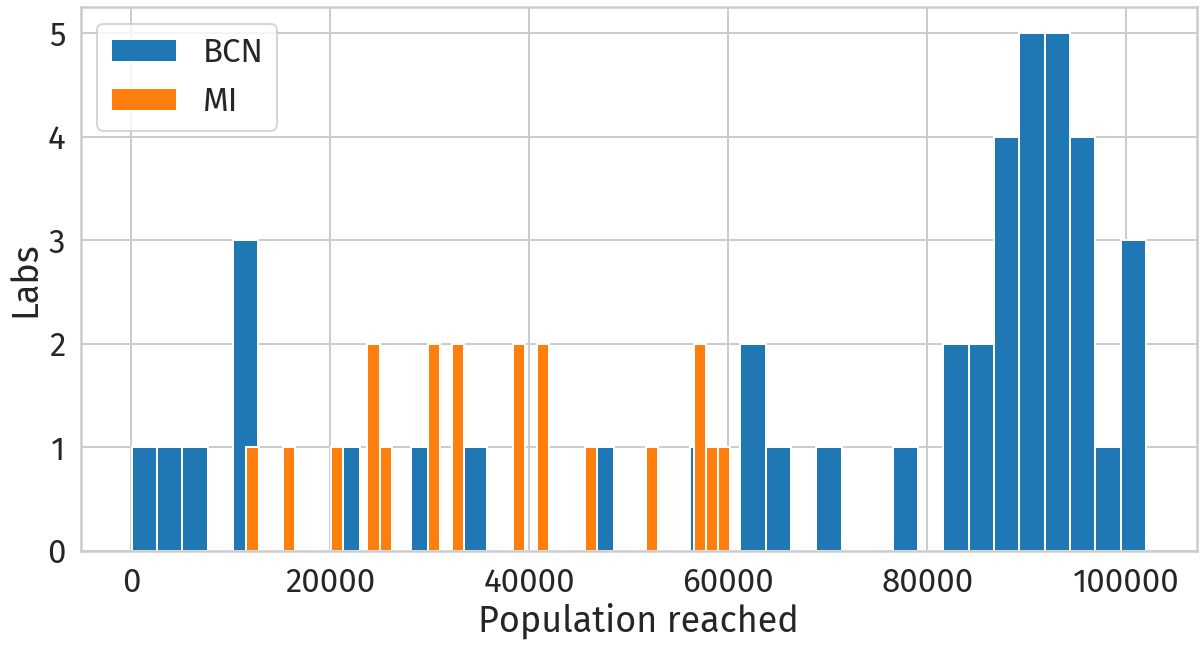

In [27]:
full_map_data.groupby("Cluster")["total_pop"].plot(kind="hist", bins=40, figsize=(20,10), legend=True)
plt.xlabel('Population reached')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_population_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_population_grouped_hist.png", dpi=300, bbox_inches="tight")

plot the data for each lab

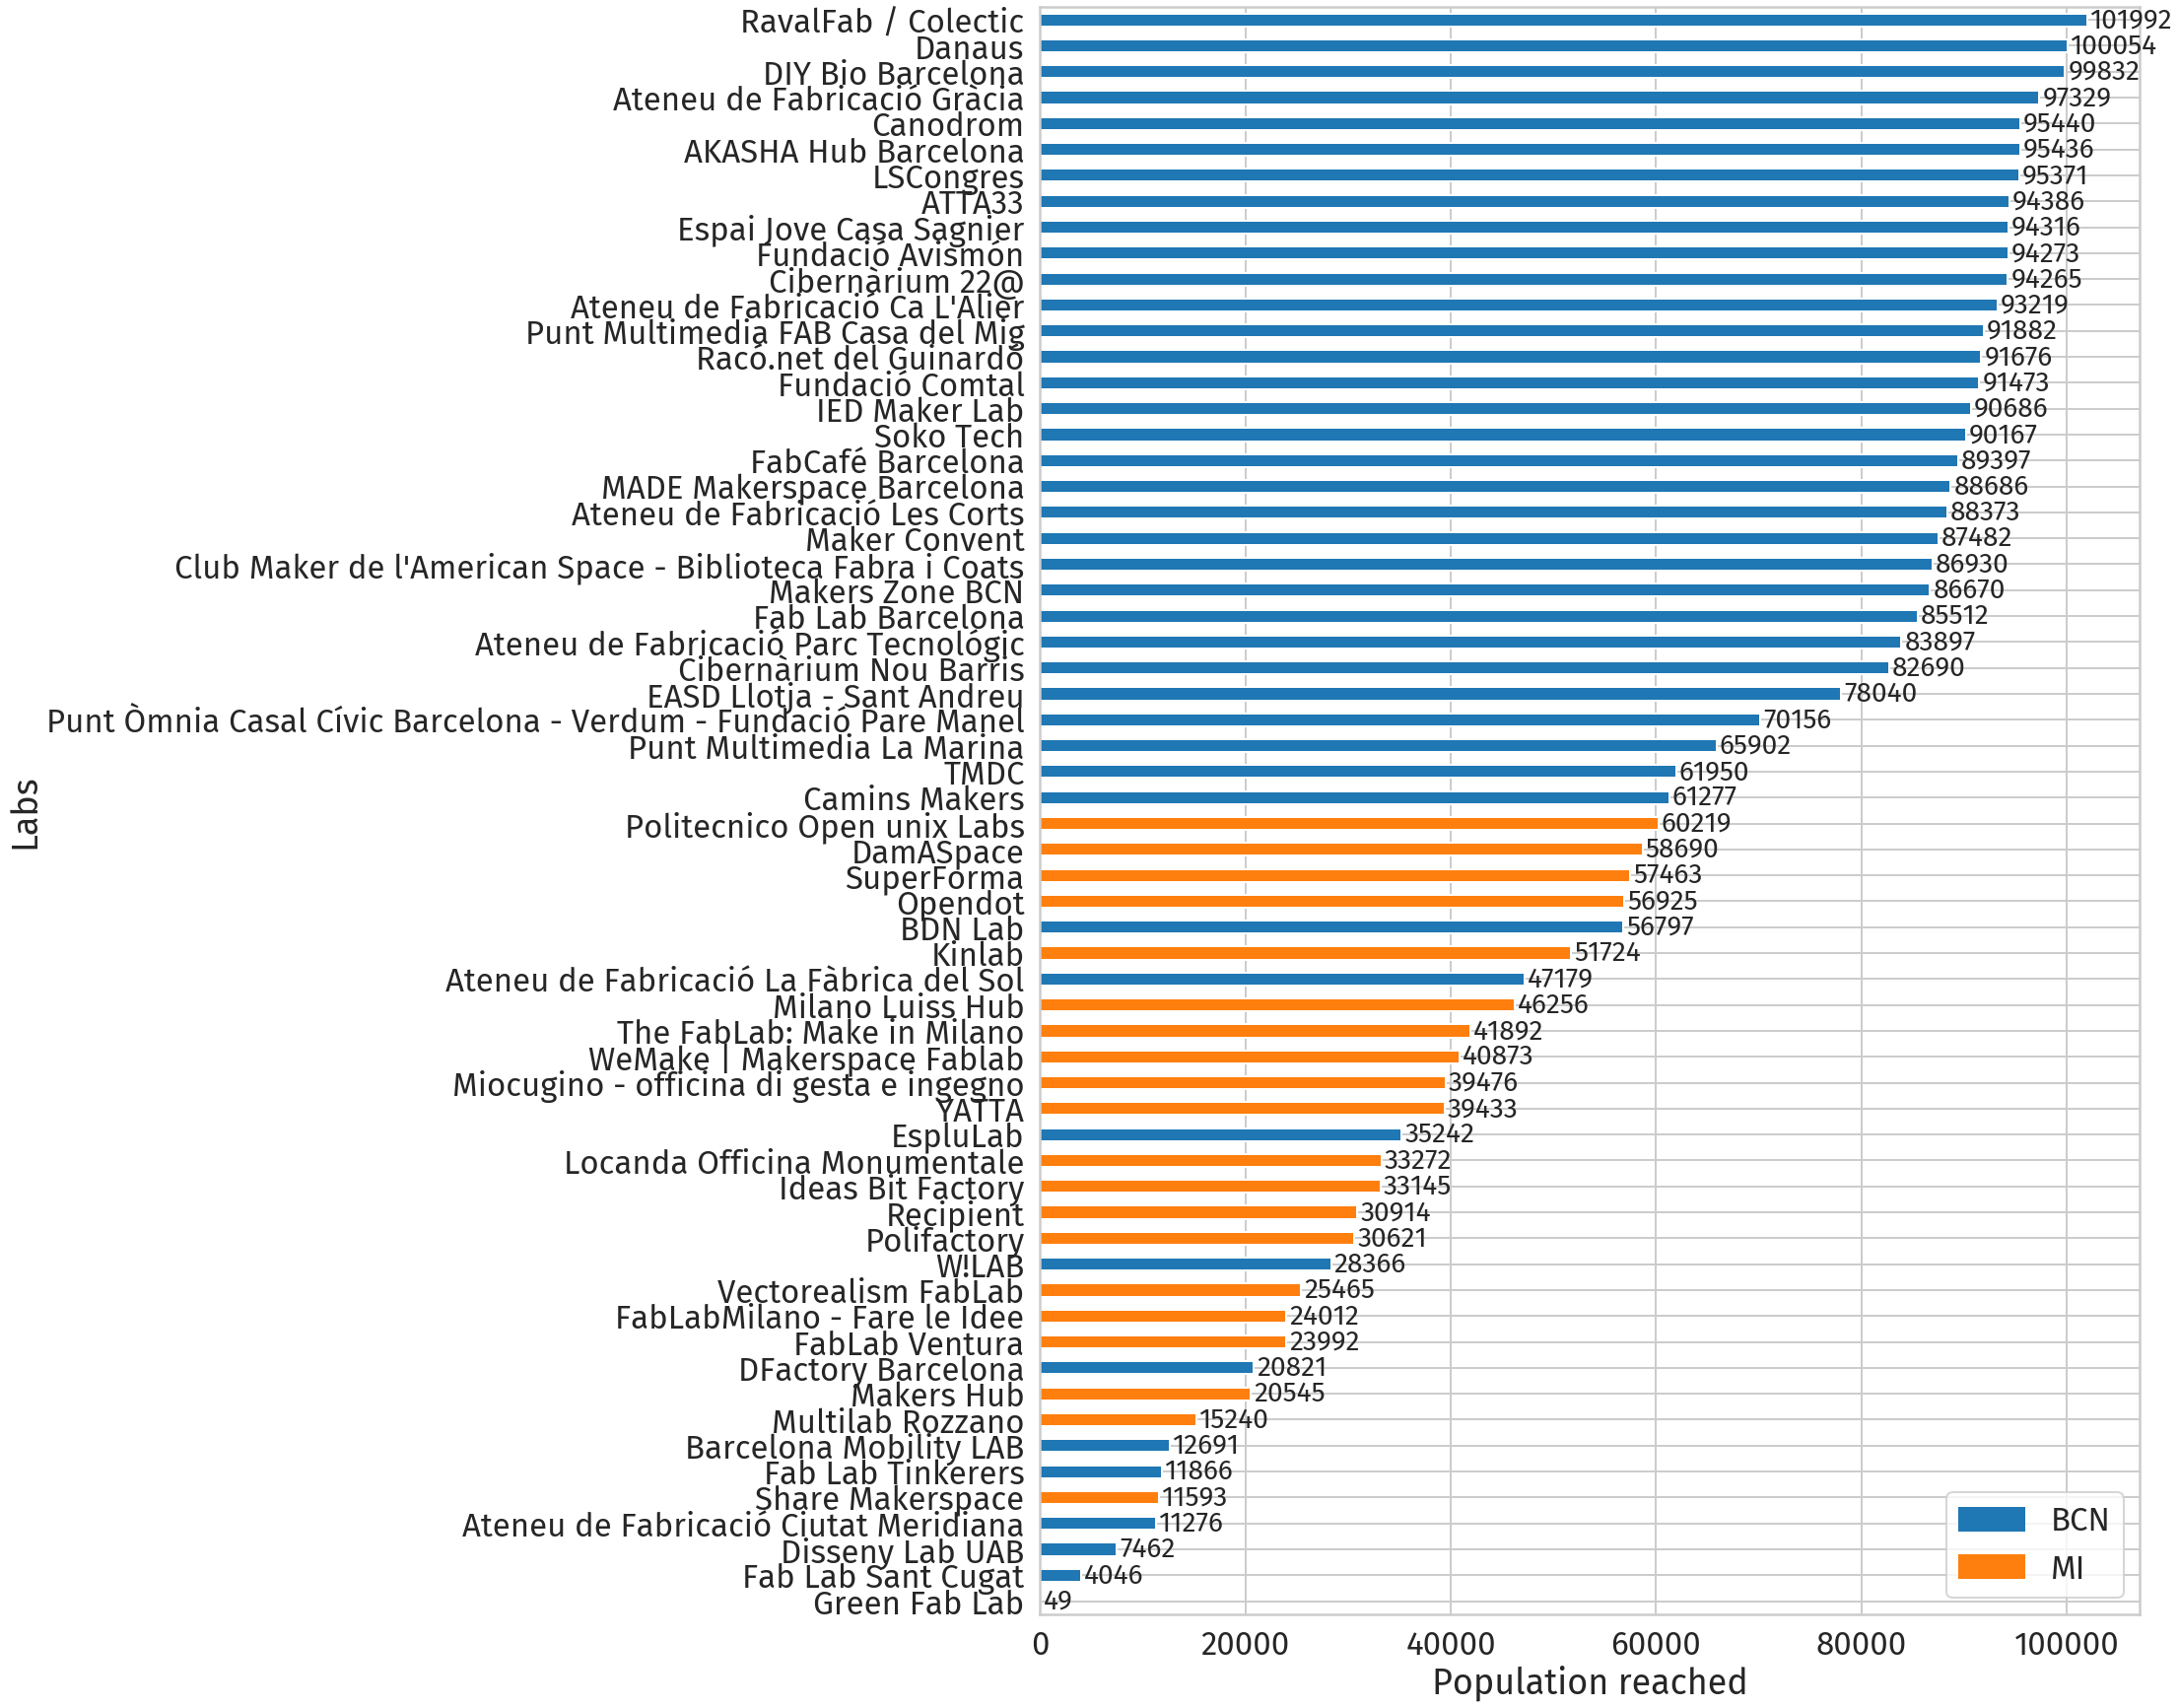

In [28]:
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['total_pop'])['total_pop'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['total_pop'])['Cluster']], figsize=(20,30), legend=True)
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Population reached')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_population_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_population_grouped_bar.png", dpi=300, bbox_inches="tight")

plot the data

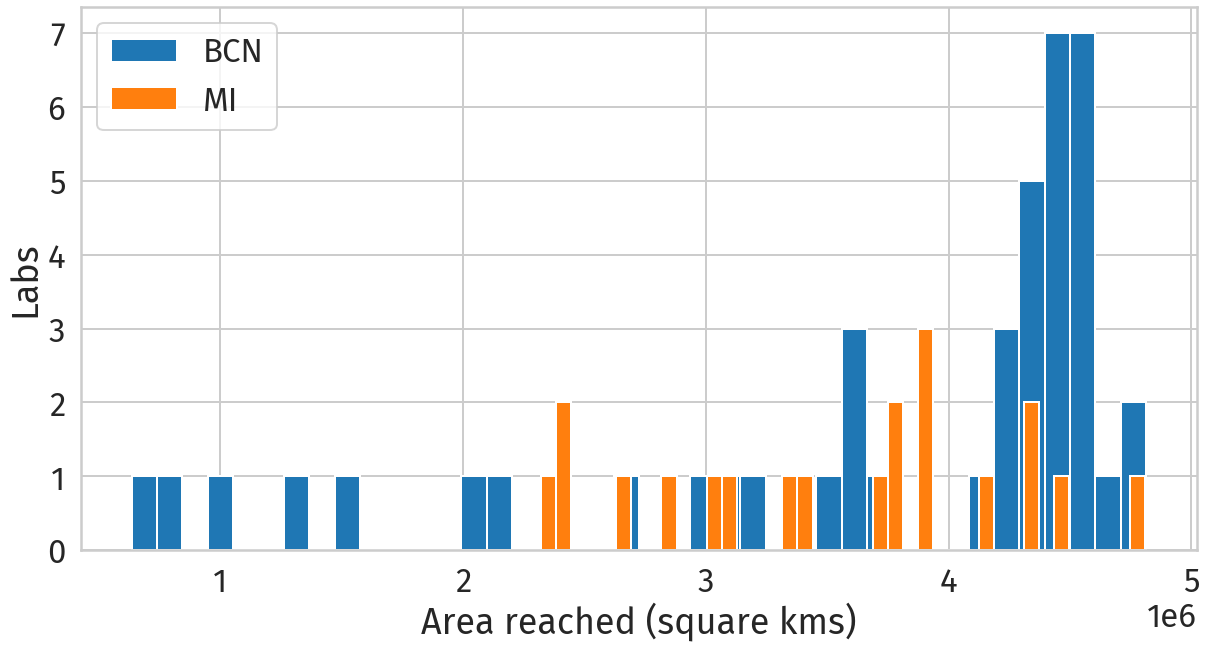

In [29]:
full_map_data.groupby("Cluster")["area"].plot(kind="hist", bins=40, figsize=(20,10), legend=True)
plt.xlabel('Area reached (square kms)')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_area_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_area_grouped_hist.png", dpi=300, bbox_inches="tight")

plot the data 

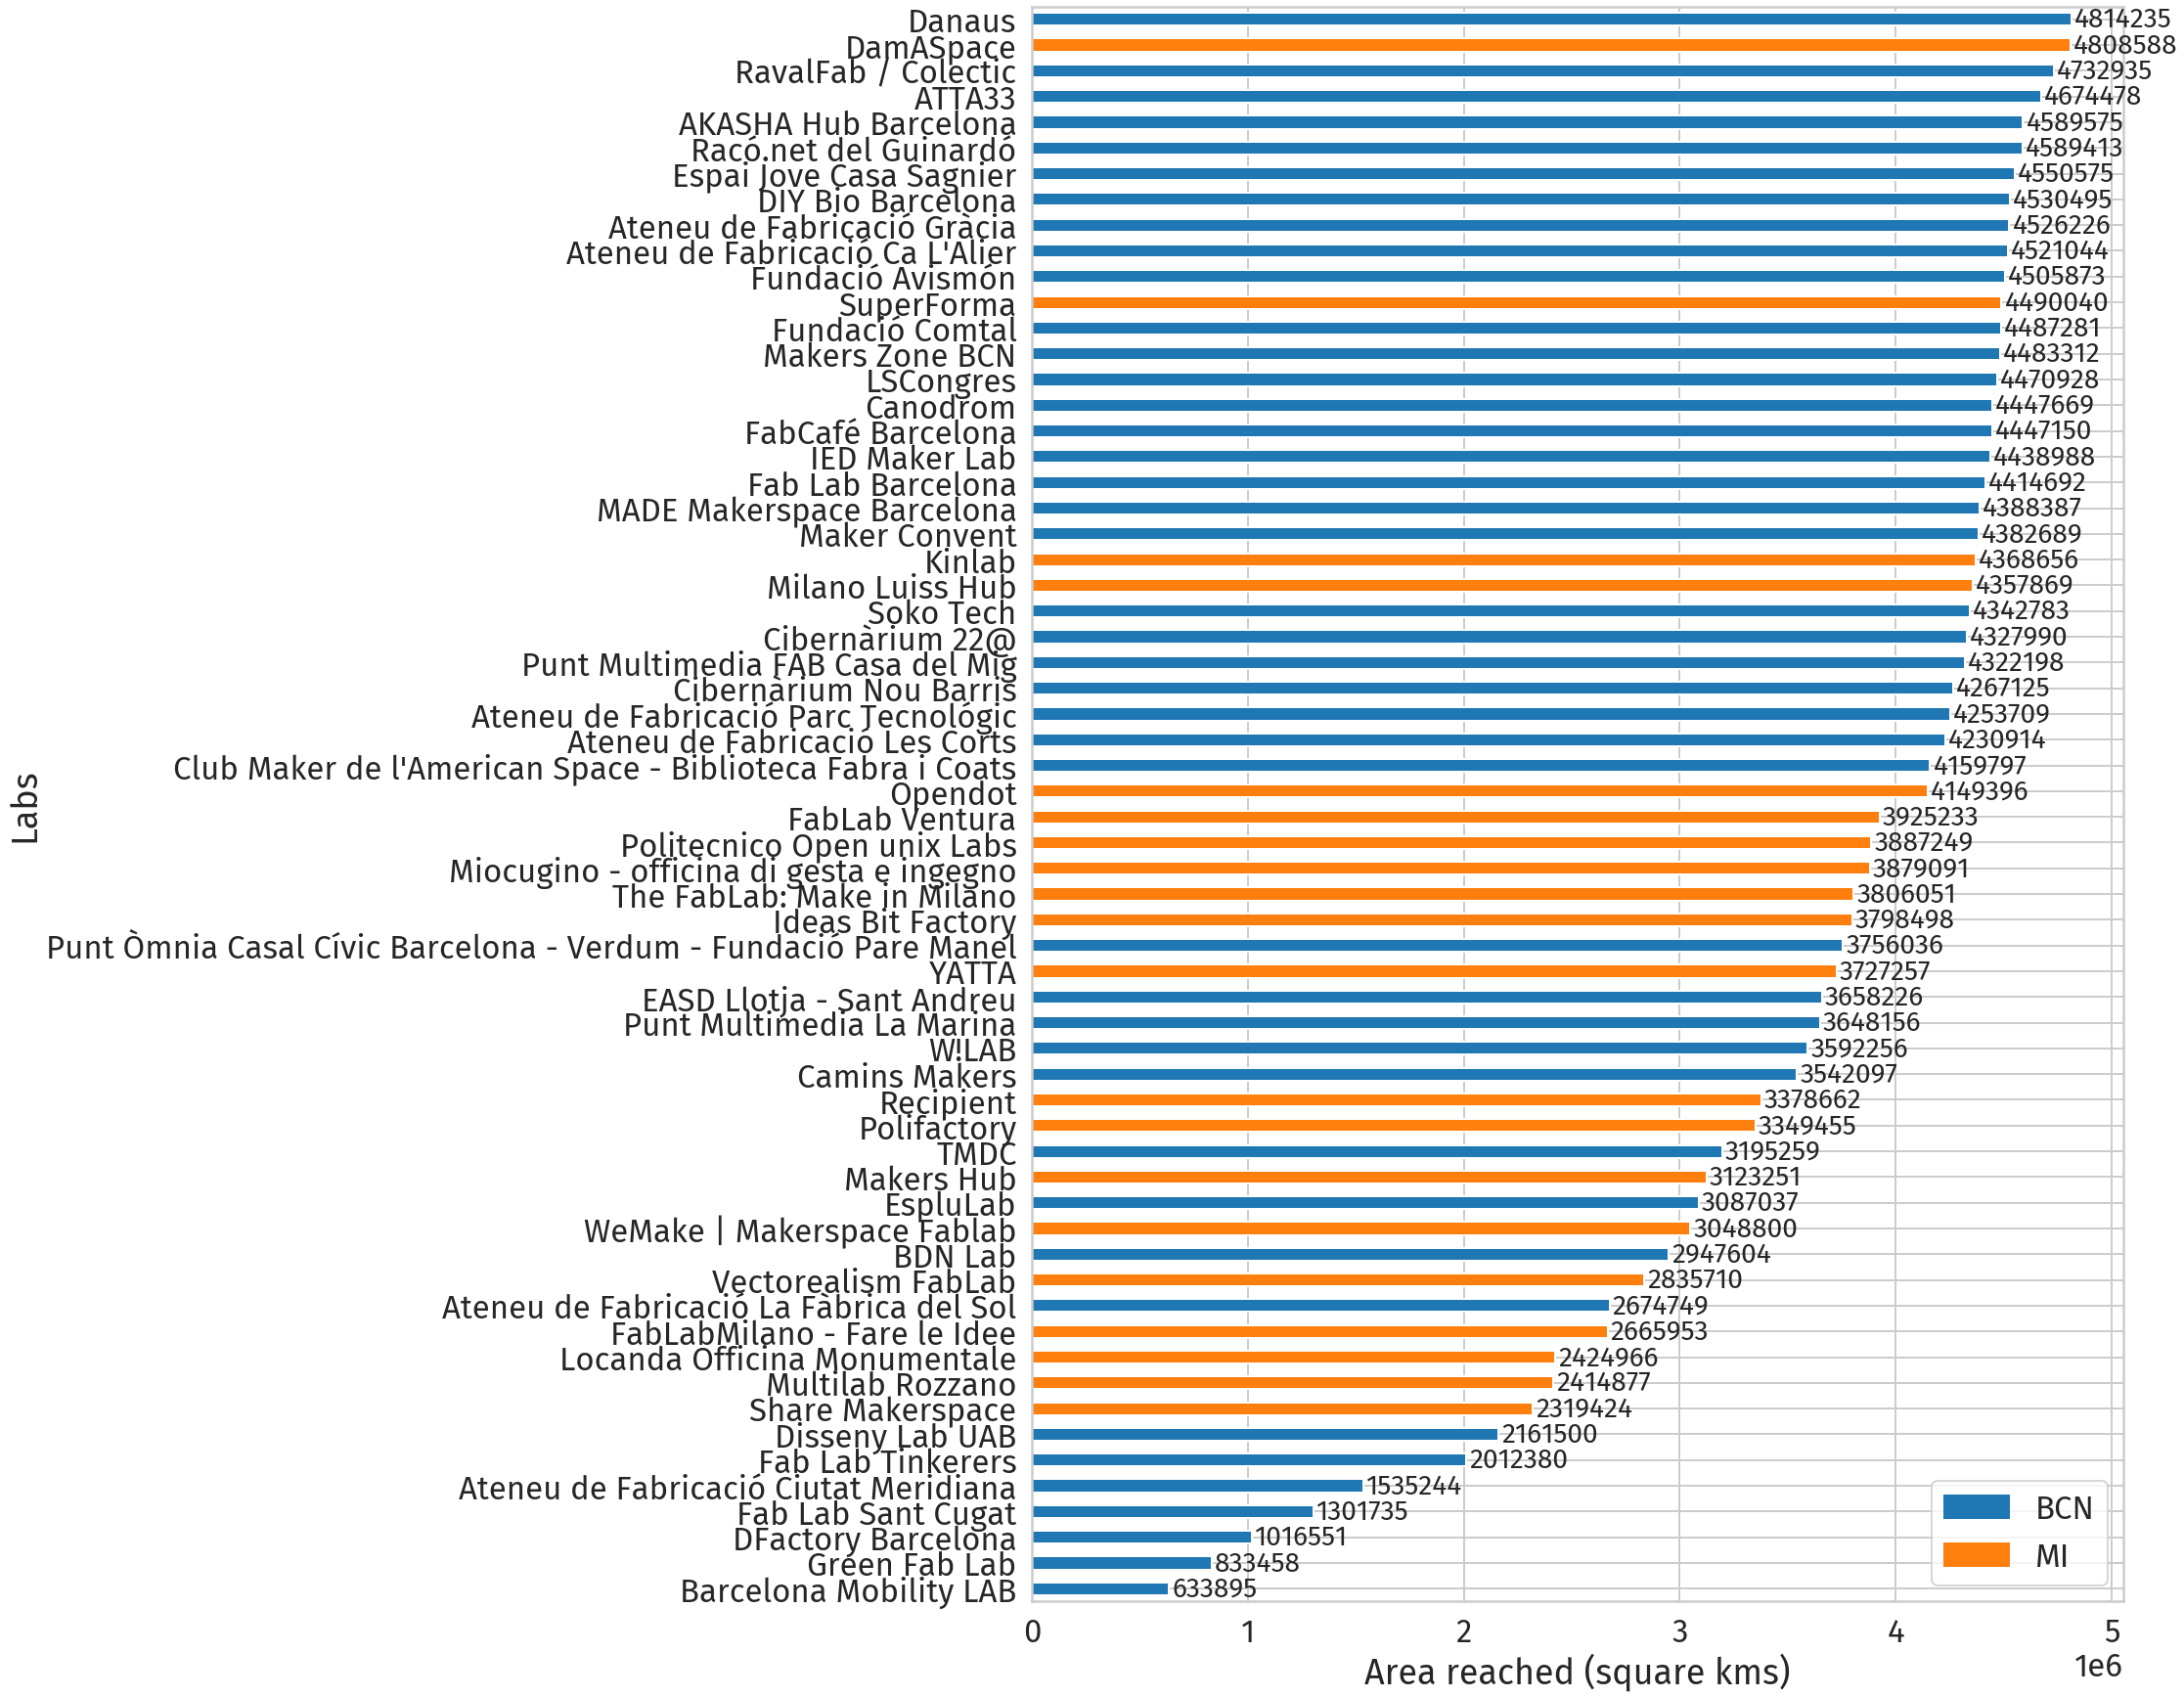

In [30]:
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['area'])['area'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['area'])['Cluster']], figsize=(20,30), legend=True)
ax.bar_label(ax.containers[0], fmt="%.2f", size=28, padding=3)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Area reached (square kms)')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_area_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_area_grouped_bar.png", dpi=300, bbox_inches="tight")

plot the data

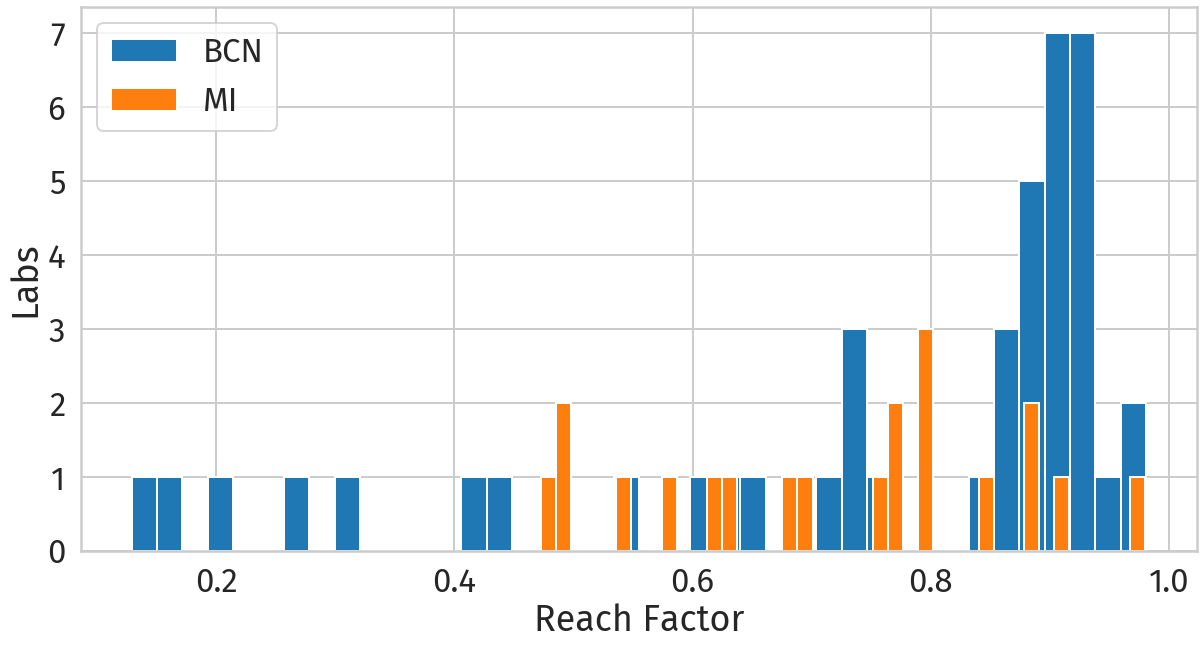

In [31]:
full_map_data.groupby("Cluster")["reachfactor"].plot(kind="hist", bins=40, figsize=(20,10), legend=True)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_reachfactor_grouped_hist.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_reachfactor_grouped_hist.png", dpi=300, bbox_inches="tight")

plot the data

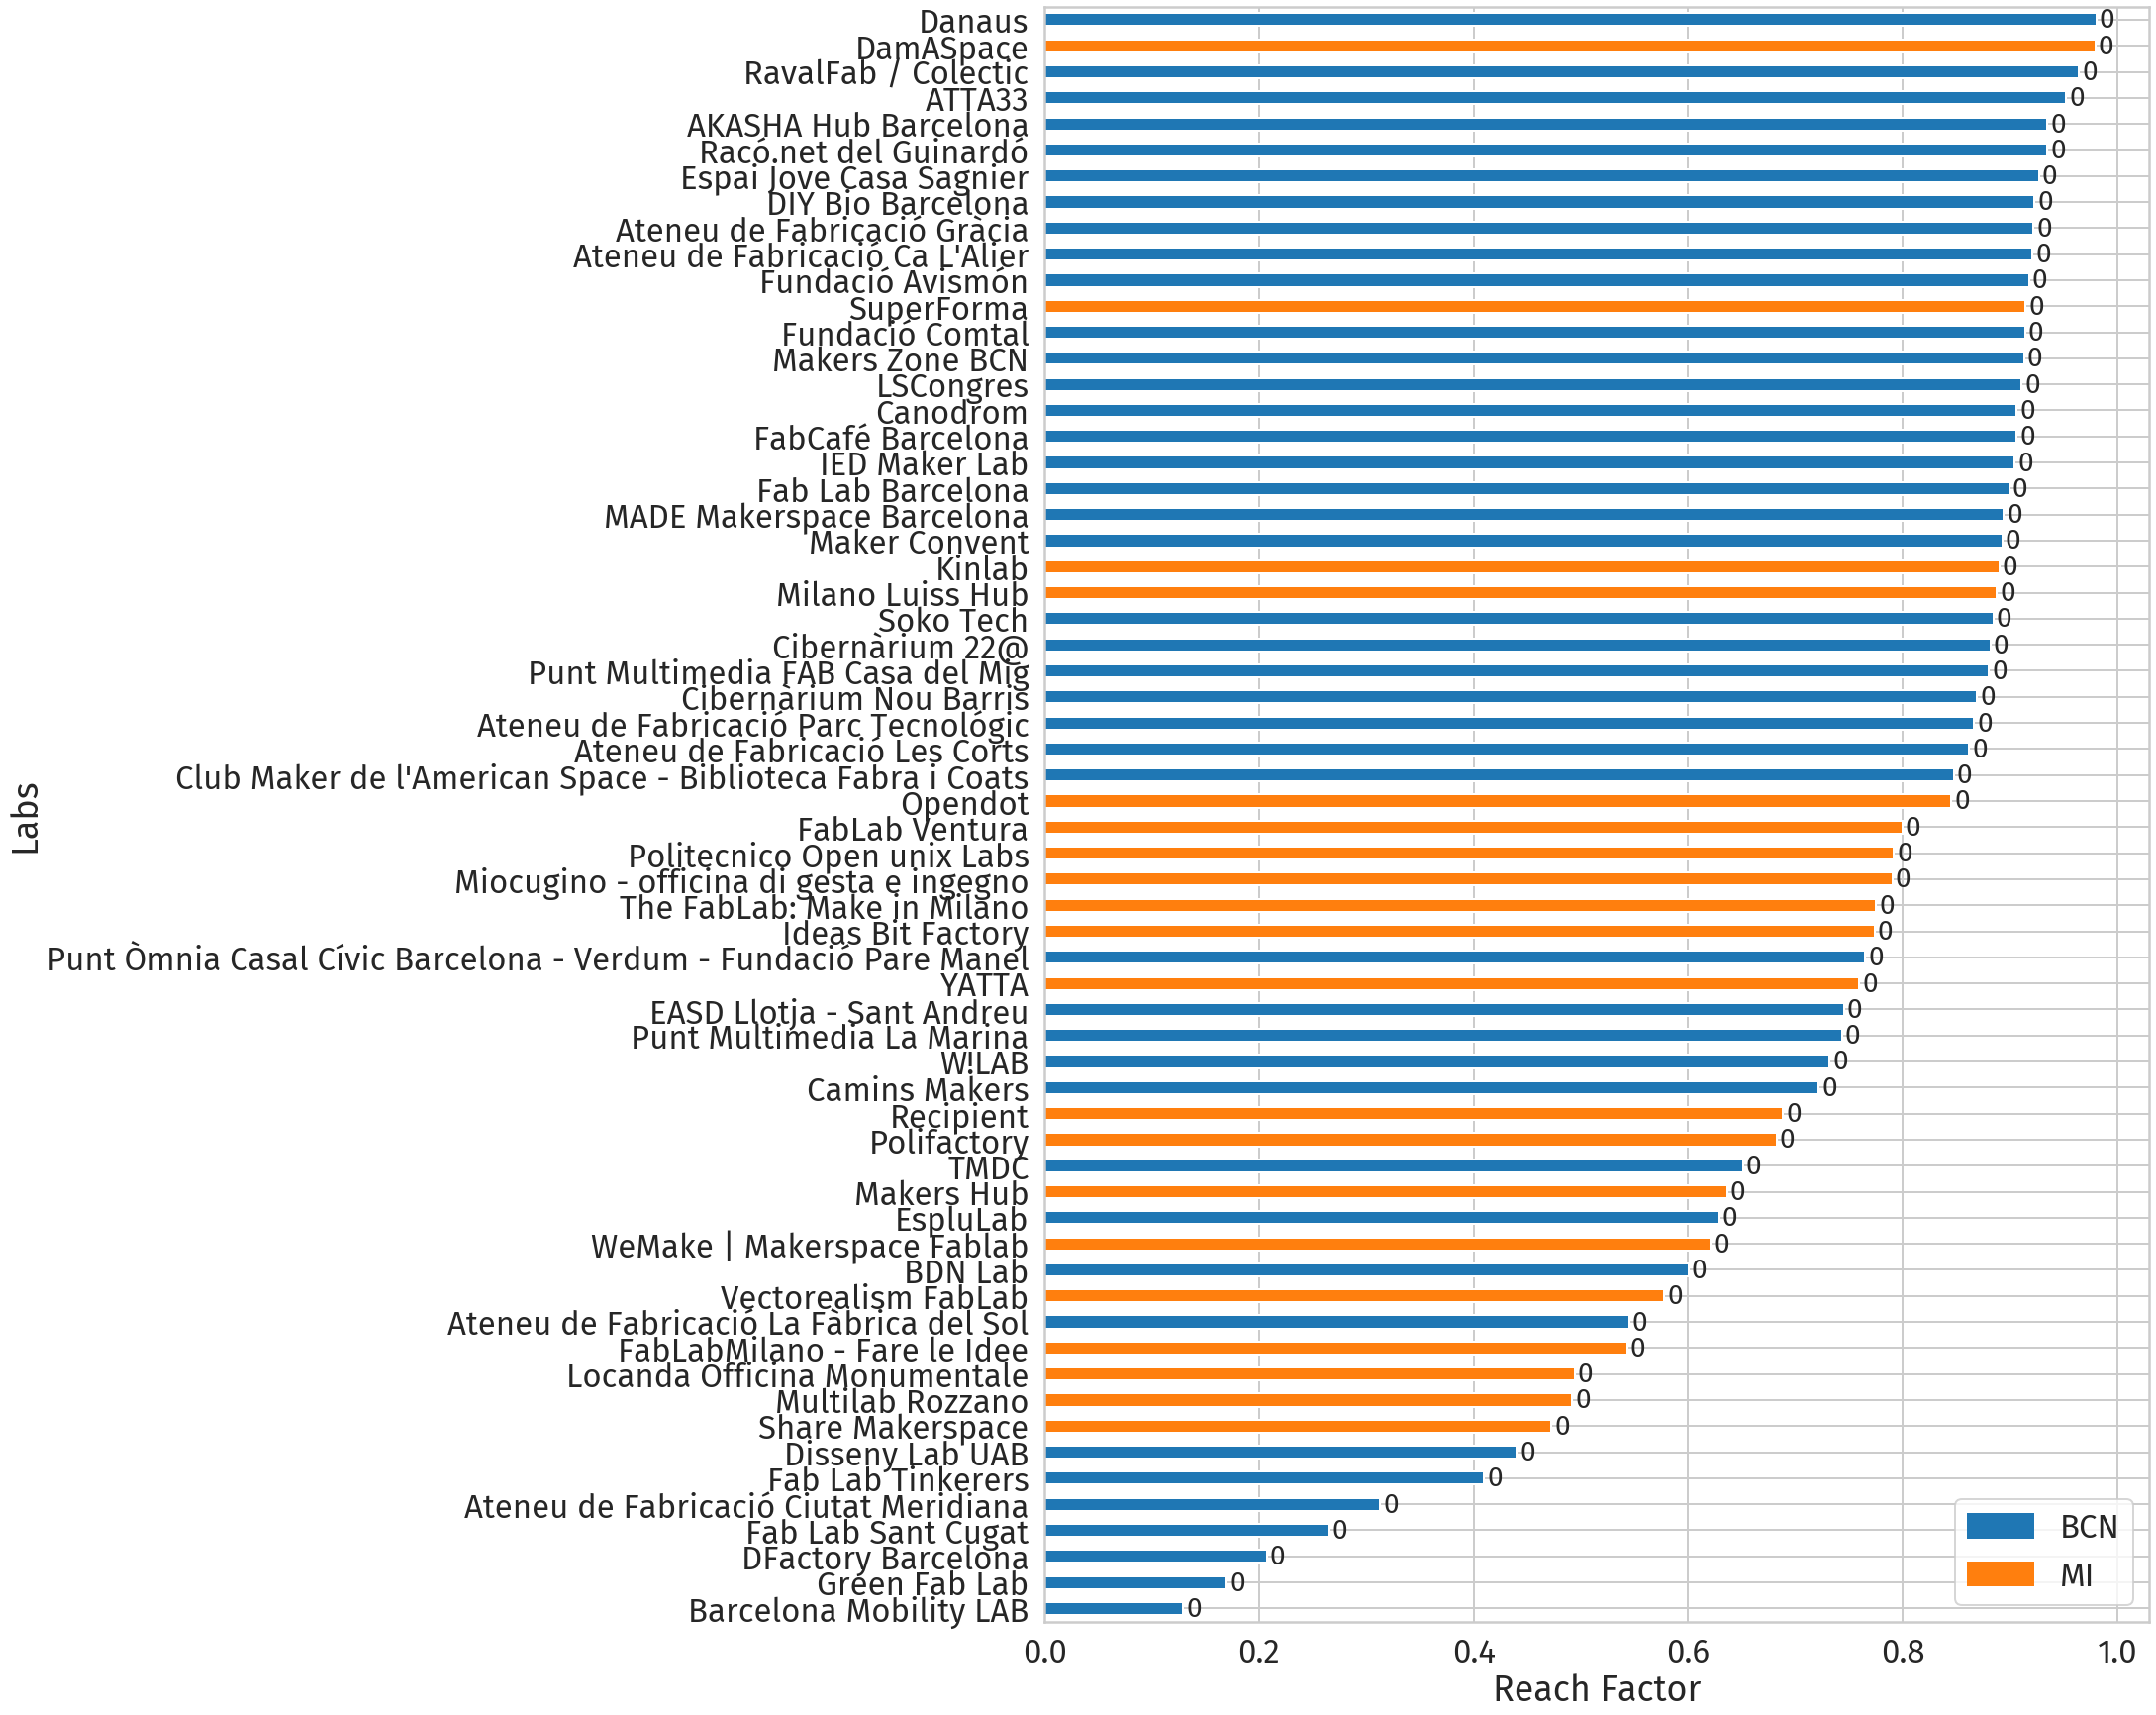

In [32]:
colors = {'BCN': sns.color_palette()[0], 'MI': sns.color_palette()[1]}
ax = full_map_data.sort_values(by=['reachfactor'])['reachfactor'].plot(kind='barh', color=[colors[i] for i in full_map_data.sort_values(by=['reachfactor'])['Cluster']], figsize=(20,30), legend=True)
ax.bar_label(ax.containers[0], fmt="%d", size=28, padding=3)
legend_elements = [Patch(facecolor=colors['BCN'], edgecolor=colors['BCN'],label='BCN'), Patch(facecolor=colors['MI'], edgecolor=colors['MI'],label='MI')]
ax.legend(handles=legend_elements)
plt.xlabel('Reach Factor')
plt.ylabel('Labs')
plt.savefig("svg" + os.sep + "labs_reachfactor_grouped_bar.svg", bbox_inches="tight")
plt.savefig("png" + os.sep + "labs_reachfactor_grouped_bar.png", dpi=300, bbox_inches="tight")

### Isochrones

create the map

In [33]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

In [34]:
for iso in data:
  folium.GeoJson(iso, name="geojson").add_to(m)
for loc in locations:
  #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
  folium.Circle(
    radius=30,
    location=[locations[loc][1],locations[loc][0]],
    popup=loc,
    tooltip=loc,
    color="crimson",
    fill="crimson",
).add_to(m)


show the map

red points = labs<Br/>
blu lines = isocrones 15' for each lab as center

In [35]:
folium.LayerControl().add_to(m)
m

save the web map

In [36]:
m.save("html" + os.sep + "isochrones.html")

### Isochrones with color from population reached

create the legend with a graduated color scale (yellow less, blu more)

In [37]:
linear = cmp.LinearColormap(
    ['yellow', 'green', 'blue'],
    vmin=map_data['total_pop'].min(), vmax=map_data['total_pop'].max(),
    caption='Total population'
)
linear

create the map

In [38]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

In [39]:
for iso in data:
  fillColor = map_data.loc[iso["name"]]["total_pop"]
  folium.GeoJson(iso, 
                 name="geojson", 
                 style_function=lambda feature: {
                     "fillColor": linear(feature["properties"]["total_pop"]),
                     "fillOpacity": 0.3,
                     "color": "gray",
                     "weight": 1,
                     "dashArray": ''
                     },
                 ).add_to(m)

for loc in locations:
    #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
    folium.Circle(
        radius=30,
        location=[locations[loc][1],locations[loc][0]],
        popup=loc,
        tooltip=loc,
        fill=True,
        color="crimson",
        fillColor="crimson"
    ).add_to(m)

folium.LayerControl().add_to(m)
m.add_child(linear)

save the map

In [40]:
m.save("html" + os.sep + "isochrones_popcolor.html")

add labels to the map

In [41]:
m=folium.Map(location=[41.396721,2.1943200000000003],tiles='stamentoner')
folium.TileLayer('OpenStreetMap').add_to(m)
folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)

for iso in data:
  fillColor = map_data.loc[iso["name"]]["total_pop"]
  folium.GeoJson(iso, 
                 name="geojson", 
                 style_function=lambda feature: {
                     "fillColor": linear(feature["properties"]["total_pop"]),
                     "fillOpacity": 0.3,
                     "color": "gray",
                     "weight": 1,
                     "dashArray": ''
                     },
                 ).add_to(m)

for loc in locations:
    #folium.Marker(location=[locations[loc][1],locations[loc][0]],popup=loc,tooltip=loc).add_to(folium.FeatureGroup(name='Labs').add_to(m))
    folium.Circle(
        radius=30,
        location=[locations[loc][1],locations[loc][0]],
        popup=loc,
        tooltip=loc,
        fill=True,
        color="crimson",
        fillColor="crimson"
    ).add_to(m)
    folium.map.Marker(
        [locations[loc][1] + 0.0, locations[loc][0] - 0.0],
        icon=folium.features.DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="background-color: rgba(255, 255, 255, 0.75); padding: 5px; font-size: 10px; font-family:'+'Fira Sans;'+'">'+loc+'</div>',
        )
    ).add_to(m)

folium.LayerControl().add_to(m)
m.add_child(linear)

save the map

In [42]:
m.save("html" + os.sep + "isochrones_popcolor_labels.html")